This script aims to summarize PBA50 UrbanSim 2015 and 2035 housing and jobs spatial distributions for SB150 reporting. 
It creates 0.25 mile and 0.5 mile buffers around existing and proposed transit stops and stations in year 2015 and year 2035. The buffer shapes are then spatially joined to p10 parcel shape in GIS to identify parcels within each type of buffer. Then, it calculates the numbers of housing units and jobs within each type of buffer in 2015 and 2035. 

See Asana Task, Populate Part A modeling tables: https://app.asana.com/0/1199678736959518/1200864906006764/f

In [1]:
import os
import fiona
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt  # for mapping
import contextily as ctx         # for adding base_map to maps

### All transit stations and stops

In [2]:
transit_stops = gpd.read_file(r'M:\Data\GIS layers\Blueprint Land Use Strategies\2022_SB150_Data_Request_Attachment_A\Transit_Stops_-_Existing_and_Planned_(2021)\transitstops_existing_planned_2021.shp')
print('read {} rows of transit stations and stops data, with {} unique objectid'.format(
    transit_stops.shape[0],
    transit_stops.objectid.nunique()))
print(list(transit_stops))
transit_stops.head()

read 40580 rows of transit stations and stops data, with 40580 unique objectid
['objectid', 'agency_nm', 'agency_id', 'route_l_nm', 'route_s_nm', 'route_id', 'route_type', 'stop_nm', 'stop_id', 'am_av_hdwy', 'pm_av_hdwy', 'major_stop', 'status', 'committed', 'exp_open', 'ppa_id', 'ppa_nm', 'pba50_id', 'geometry']


objectid                                      agency_nm agency_id  \
0     40581  San Francisco Municipal Transportation Agency        SF   
1     40582  San Francisco Municipal Transportation Agency        SF   
2     40583  San Francisco Municipal Transportation Agency        SF   
3     40584  San Francisco Municipal Transportation Agency        SF   
4     40585  San Francisco Municipal Transportation Agency        SF   

          route_l_nm route_s_nm  route_id route_type  \
0        19TH AVENUE         28     SF:28        Bus   
1  19TH AVENUE RAPID        28R    SF:28R        Bus   
2             SUNSET         29     SF:29        Bus   
3      OWL OCEANVIEW      M-OWL  SF:M-OWL        Bus   
4          EXCELSIOR         52     SF:52        Bus   

                     stop_nm stop_id  am_av_hdwy  pm_av_hdwy  major_stop  \
0  19th Avenue & Holloway St   10390         6.0        10.0           1   
1  19th Avenue & Holloway St   10390        10.0        10.0           1   
2  19th Avenue & Holloway St   10390         6.0        11.0           1   
3  19th Avenue & Holloway St   10390        20.0         NaN           1   
4  Dublin St & La Grande Ave   10913        15.0        21.0           0   

           status committed exp_open  ppa_id ppa_nm pba50_id  \
0  Existing/Built      None     None     NaN   None     None   
1  Existing/Built      None     None     NaN   None     None   
2  Existing/Built      None     None     NaN   None     None   
3  Existing/Built      None     None     NaN   None     None   
4  Existing/Built      None     None     NaN   None     None   

                      geometry  
0  POINT (-122.47510 37.72119)  
1  POINT (-122.47510 37.72119)  
2  POINT (-122.47510 37.72119)  
3  POINT (-122.47510 37.72119)  
4  POINT (-122.42580 37.71919)

In [3]:
# check types of status and exp_open 
display(transit_stops[['status', 'committed', 'exp_open']].drop_duplicates())

status committed   exp_open
0          Existing/Built      None       None
13992     Final Blueprint      None       None
34497     Final Blueprint        No  2021-2035
36239  Under Construction       Yes  2021-2035
40256     Final Blueprint        No  2036-2050

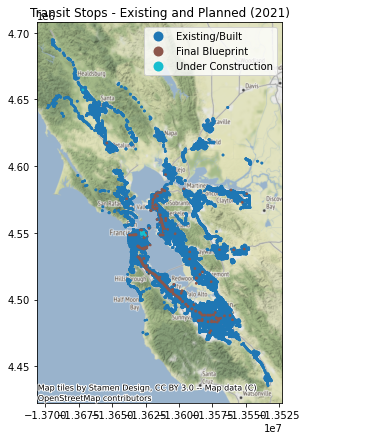

In [4]:
figure, axes = plt.subplots(figsize=(11,7))
axes.set(title='Transit Stops - Existing and Planned (2021)')
axes = transit_stops.to_crs(epsg=3857).plot(ax=axes, markersize=3, column='status', legend=True)
ctx.add_basemap(axes)

sf_extent in epsg=3857: [-13647769.57125534   4530099.85811138 -13614373.72401736
   4558257.46098645]


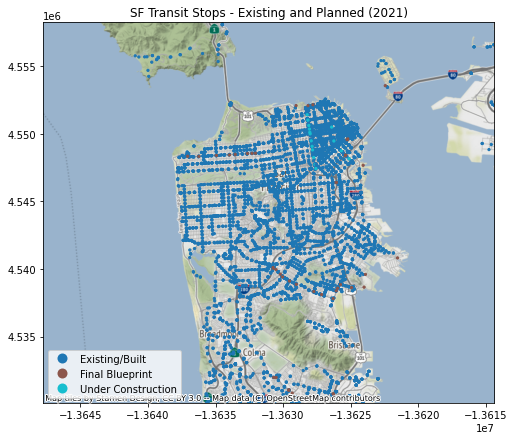

In [5]:
# Plot map of transit stops in SF
# First, create quick dataframe with bounding box to convert lat/long to epsg=3857
sf_extent_df  = pd.DataFrame({'Longitude':[-122.6, -122.3], 'Latitude':[37.65, 37.85]})
sf_extent_gdf = gpd.GeoDataFrame(sf_extent_df, 
                                 geometry=gpd.points_from_xy(sf_extent_df.Longitude, sf_extent_df.Latitude),
                                 crs=4326)
sf_extent_gdf = sf_extent_gdf.to_crs(epsg=3857)
print("sf_extent in epsg=3857: {}".format(sf_extent_gdf.total_bounds))

# Create the map with basemap
figure, axesSF = plt.subplots(figsize=(11,7))
axesSF.set(title='SF Transit Stops - Existing and Planned (2021)')
axesSF.set_xlim(sf_extent_gdf.total_bounds[0], sf_extent_gdf.total_bounds[2])
axesSF.set_ylim(sf_extent_gdf.total_bounds[1], sf_extent_gdf.total_bounds[3])
axesSF = transit_stops.to_crs(epsg=3857).plot(ax=axesSF, markersize=5, column='status', legend=True)
ctx.add_basemap(axesSF)

sj_extent in epsg=3857: [-13603241.77493803   4460035.52765301 -13547582.0295414
   4509031.39307665]


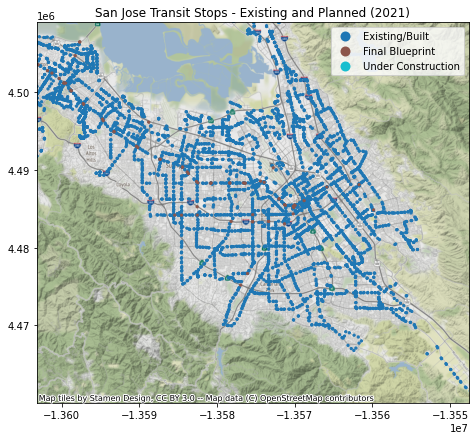

In [6]:
# Plot map of transit stops in San Jose
# First, create quick dataframe with bounding box to convert lat/long to epsg=3857
sj_extent_df  = pd.DataFrame({'Longitude':[-122.2, -121.7], 'Latitude':[37.15, 37.50]})
sj_extent_gdf = gpd.GeoDataFrame(sj_extent_df, 
                                 geometry=gpd.points_from_xy(sj_extent_df.Longitude, sj_extent_df.Latitude),
                                 crs=4326)
sj_extent_gdf = sj_extent_gdf.to_crs(epsg=3857)
print("sj_extent in epsg=3857: {}".format(sj_extent_gdf.total_bounds))

# Create the map with basemap
figure, axesSJ = plt.subplots(figsize=(11,7))
axesSJ.set(title='San Jose Transit Stops - Existing and Planned (2021)')
axesSJ.set_xlim(sj_extent_gdf.total_bounds[0], sj_extent_gdf.total_bounds[2])
axesSJ.set_ylim(sj_extent_gdf.total_bounds[1], sj_extent_gdf.total_bounds[3])
transit_stops.to_crs(epsg=3857).plot(ax=axesSJ, markersize=5, column='status', legend=True)
ctx.add_basemap(axesSJ)

sjzoom_extent in epsg=3857: [-13566506.34297625   4488005.20921538 -13555374.39389692
   4495009.25862632]


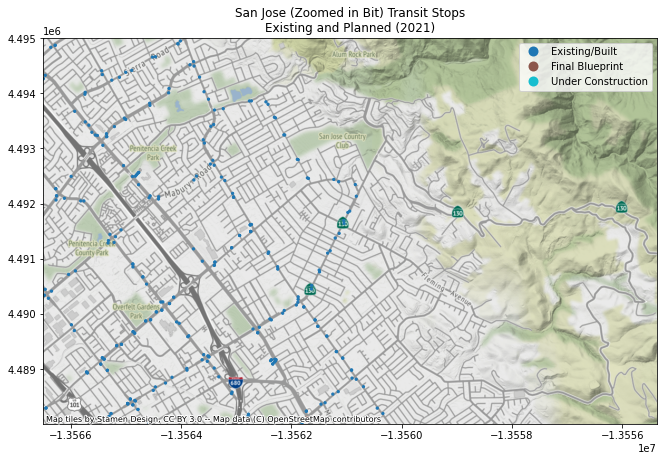

In [7]:
# Plot map of transit stops in San Jose zoomed in
# First, create quick dataframe with bounding box to convert lat/long to epsg=3857
sjzoom_extent_df  = pd.DataFrame({'Longitude':[-121.87, -121.77], 'Latitude':[37.35, 37.40]})
sjzoom_extent_gdf = gpd.GeoDataFrame(sjzoom_extent_df, 
                                     geometry=gpd.points_from_xy(sjzoom_extent_df.Longitude, sjzoom_extent_df.Latitude),
                                     crs=4326)
sjzoom_extent_gdf = sjzoom_extent_gdf.to_crs(epsg=3857)
print("sjzoom_extent in epsg=3857: {}".format(sjzoom_extent_gdf.total_bounds))

# Create the map with basemap
figure, axesSJ = plt.subplots(figsize=(11,11))
axesSJ.set(title='San Jose (Zoomed in Bit) Transit Stops\nExisting and Planned (2021)')
axesSJ.set_xlim(sjzoom_extent_gdf.total_bounds[0], sjzoom_extent_gdf.total_bounds[2])
axesSJ.set_ylim(sjzoom_extent_gdf.total_bounds[1], sjzoom_extent_gdf.total_bounds[3])
transit_stops.to_crs(epsg=3857).plot(ax=axesSJ, markersize=5, column='status', legend=True)
ctx.add_basemap(axesSJ)

In [8]:
# fill out missing 'exp_open' for stops/stations in 'Final Blueprint' projects
missing_Year = transit_stops.loc[(transit_stops.status == 'Final Blueprint') & (transit_stops.exp_open.isnull())]
print(missing_Year.shape)
print(missing_Year.pba50_id.value_counts())

transit_stops.loc[transit_stops.pba50_id == 'MU-042', 'exp_open'] = '2021-2035' # open in 2027
transit_stops.loc[transit_stops.pba50_id == 'SM-011', 'exp_open'] = '2036-2050' # open in 2040
transit_stops.loc[transit_stops.pba50_id == 'SC-014', 'exp_open'] = '2036-2050' # open in 2040
transit_stops.loc[transit_stops.pba50_id == 'CC-015', 'exp_open'] = '2021-2035' # open in 2026
transit_stops.loc[transit_stops.pba50_id == 'AL-016', 'exp_open'] = '2021-2035' # open in 2020
transit_stops.loc[transit_stops.pba50_id == 'MU-033', 'exp_open'] = '2036-2050' # open in 2036
transit_stops.loc[transit_stops.pba50_id == 'SF-024', 'exp_open'] = '2021-2035' # open in 2030
transit_stops.loc[transit_stops.pba50_id == 'SN-030', 'exp_open'] = '2021-2035' # open in 2025

# double check
transit_stops.loc[(transit_stops.status == 'Final Blueprint') & (transit_stops.exp_open.isnull())].shape[0] == 0

(239, 19)
MU-042    99
SM-011    78
SC-014    35
CC-015    17
AL-016     4
MU-033     3
SF-024     2
SN-030     1
Name: pba50_id, dtype: int64


True

In [9]:
# select transit stations/stops for 2015 and 2035
stop_2015 = transit_stops.loc[transit_stops.status == 'Existing/Built']
stop_2035 = transit_stops.loc[((transit_stops.status.isin(['Final Blueprint', 'Under Construction'])) & (
                                transit_stops.exp_open == '2021-2035')) | (
                              transit_stops.status == 'Existing/Built')]

# double check the status
print('{} stops in 2015'.format(stop_2015.shape[0]))
display(stop_2015[['status', 'committed', 'exp_open']].drop_duplicates())

print('{} stops in 2035'.format(stop_2035.shape[0]))
display(stop_2035[['status', 'committed', 'exp_open']].drop_duplicates())

40223 stops in 2015


status committed exp_open
0  Existing/Built      None     None

40445 stops in 2035


status committed   exp_open
0          Existing/Built      None       None
13992     Final Blueprint      None  2021-2035
34497     Final Blueprint        No  2021-2035
36239  Under Construction       Yes  2021-2035

### Transit stations and stops in TPA

read 81 rows of tpa data, 81 unique objectid, crs=epsg:4326, extent=[-122.8264114    36.99622924 -121.55704951   38.55490336]


objectid              area_type  SHAPE_Leng  SHAPE_Area  \
0        82  Transit Priority Area    0.051638    0.000208   
1        83  Transit Priority Area    0.054725    0.000235   
2        84  Transit Priority Area    0.051526    0.000207   
3        85  Transit Priority Area    0.114911    0.000673   
4        86  Transit Priority Area    0.077890    0.000387   

                                            geometry  
0  POLYGON ((-121.56595 36.99623, -121.56623 36.9...  
1  POLYGON ((-121.60977 37.07798, -121.61005 37.0...  
2  POLYGON ((-121.65002 37.12207, -121.65030 37.1...  
3  POLYGON ((-121.79322 37.24318, -121.79322 37.2...  
4  POLYGON ((-121.83259 37.25544, -121.83249 37.2...

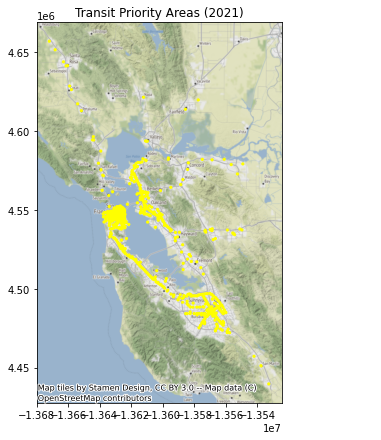

In [10]:
tpa_raw = gpd.read_file(r'M:\Data\GIS layers\Blueprint Land Use Strategies\2022_SB150_Data_Request_Attachment_A\Transit_Priority_Areas_(2021)\transit_priority_areas_2021.shp')
print('read {} rows of tpa data, {} unique objectid, crs={}, extent={}'.format(
    tpa_raw.shape[0], tpa_raw.objectid.nunique(), tpa_raw.crs, tpa_raw.total_bounds))

# Show example rows and map
display(tpa_raw.head())
figure, axes = plt.subplots(figsize=(11,7))
axes.set(title='Transit Priority Areas (2021)')
axes = tpa_raw.to_crs(epsg=3857).plot(ax=axes, color='yellow')
ctx.add_basemap(axes)

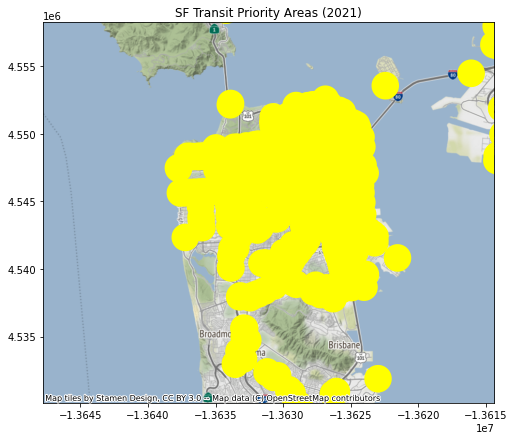

In [11]:
# Plot map of TPAs in SF
figure, axesSF = plt.subplots(figsize=(11,7))
axesSF.set(title='SF Transit Priority Areas (2021)')
axesSF.set_xlim(sf_extent_gdf.total_bounds[0], sf_extent_gdf.total_bounds[2])
axesSF.set_ylim(sf_extent_gdf.total_bounds[1], sf_extent_gdf.total_bounds[3])
tpa_raw.to_crs(epsg=3857).plot(ax=axesSF, color='yellow')
ctx.add_basemap(axesSF)

sj_extent in epsg=3857: [-13603241.77493803   4460035.52765301 -13547582.0295414
   4509031.39307665]


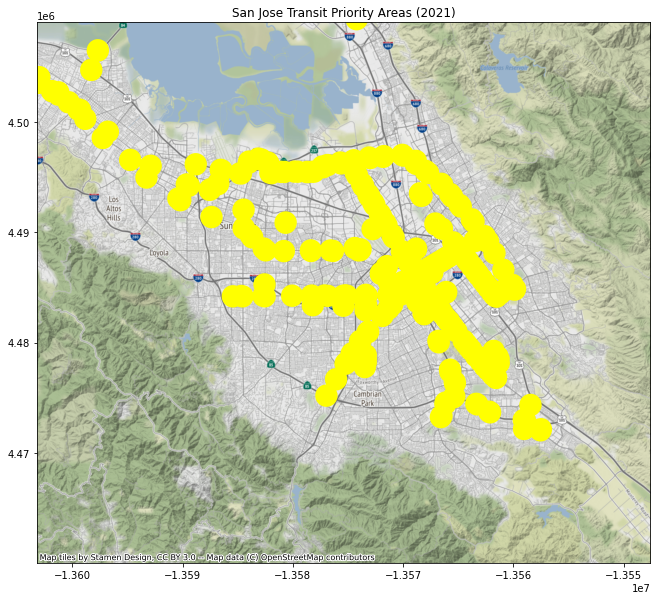

In [12]:
# Plot map of TPAs in San Jose
figure, axesSJ = plt.subplots(figsize=(11,11))
axesSJ.set(title='San Jose Transit Priority Areas (2021)')
axesSJ.set_xlim(sj_extent_gdf.total_bounds[0], sj_extent_gdf.total_bounds[2])
axesSJ.set_ylim(sj_extent_gdf.total_bounds[1], sj_extent_gdf.total_bounds[3])
tpa_raw.to_crs(epsg=3857).plot(ax=axesSJ, color='yellow')
ctx.add_basemap(axesSJ)
print("sj_extent in epsg=3857: {}".format(sj_extent_gdf.total_bounds))

18957 out of 40223 stops with TPA in 2015


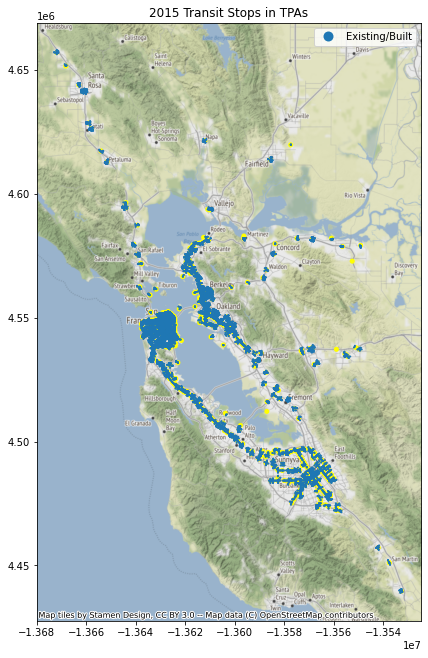

19179 out of 40445 stops with TPA in 2035


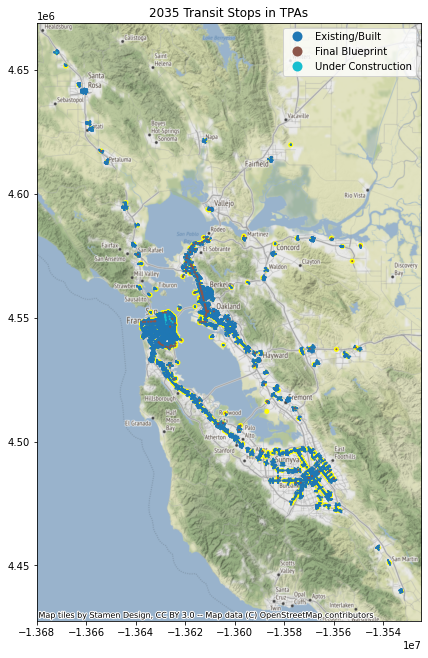

In [13]:
# get stations/stops within TPA using left join
# print(stop_2015.shape[0], stop_2015.objectid.nunique())

tpa = tpa_raw[['objectid', 'geometry']]

stop_2015_join = gpd.sjoin(stop_2015, tpa, how="left", op="within")
stop_2015_tpa = stop_2015_join.loc[stop_2015_join.objectid_right.notnull()].copy()
print('{} out of {} stops with TPA in 2015'.format(stop_2015_tpa.shape[0], stop_2015.shape[0]))
# Plot 2015 Transit Stops in TPAs & TPA
figure, axes = plt.subplots(figsize=(11,11))
axes.set(title='2015 Transit Stops in TPAs')
tpa_raw.to_crs(epsg=3857).plot(ax=axes, color='yellow')
stop_2015_tpa.to_crs(epsg=3857).plot(ax=axes, markersize=1, column='status', legend=True)
ctx.add_basemap(axes)
plt.show()

stop_2035_join = gpd.sjoin(stop_2035, tpa, how="left", op="within")
stop_2035_tpa = stop_2035_join.loc[stop_2035_join.objectid_right.notnull()].copy()
print('{} out of {} stops with TPA in 2035'.format(stop_2035_tpa.shape[0], stop_2035.shape[0]))
# Plot 2035 Transit Stops in TPAs & TPA
figure, axes = plt.subplots(figsize=(11,11))
axes.set(title='2035 Transit Stops in TPAs')
tpa_raw.to_crs(epsg=3857).plot(ax=axes, color='yellow')
axes = stop_2035_tpa.to_crs(epsg=3857).plot(ax=axes, markersize=1, column='status', legend=True)
ctx.add_basemap(axes)
plt.show()

# remove unnecessary fields
stop_2015_tpa.drop(['index_right', 'objectid_right'], axis = 1, inplace=True)
stop_2015_tpa.rename(columns = {'objectid_left': 'objectid'}, inplace=True)
stop_2035_tpa.drop(['index_right', 'objectid_right'], axis = 1, inplace=True)
stop_2035_tpa.rename(columns = {'objectid_left': 'objectid'}, inplace=True)

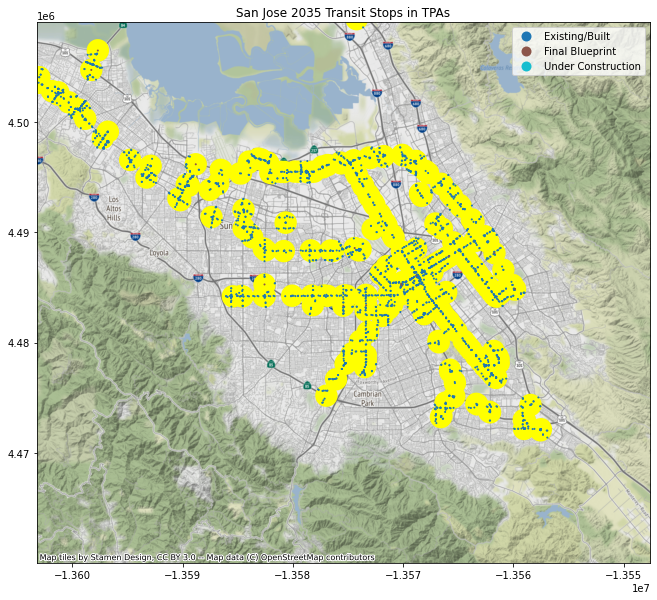

In [14]:
# Plot TPAs and 2035 Transit Stops in TPAs in San Jose
figure, axesSJ = plt.subplots(figsize=(11,11))
axesSJ.set(title='San Jose 2035 Transit Stops in TPAs')
axesSJ.set_xlim(sj_extent_gdf.total_bounds[0], sj_extent_gdf.total_bounds[2])
axesSJ.set_ylim(sj_extent_gdf.total_bounds[1], sj_extent_gdf.total_bounds[3])
tpa_raw.to_crs(epsg=3857).plot(ax=axesSJ, color='yellow')
stop_2035_tpa.to_crs(epsg=3857).plot(ax=axesSJ, markersize=1, column='status', legend=True)
ctx.add_basemap(axesSJ)

### export stops/stations data for QAQC

In [ ]:
stops_file = {'stop_2015': stop_2015,
              'stop_2035': stop_2035,
              'stop_2015_tpa': stop_2015_tpa,
              'stop_2035_tpa': stop_2035_tpa}

export_folder = 'M:\\Data\\GIS layers\\Blueprint Land Use Strategies\\2022_SB150_Data_Request_Attachment_A\\interim'

In [ ]:
for filename in stops_file:
    stops_file[filename][['objectid', 'geometry']].to_file(os.path.join(export_folder, filename+'.shp'))

### create shapes for buffers

In [15]:
def crs_to_26910(gdf):
    # EPSG 26910: NAD83 / UTM zone 10N
    # print('  crs before conversion: {}'.format(gdf.crs))
    if gdf.crs != 26910:
        return gdf.to_crs(epsg=26910)
    return gdf
    
def crs_to_4326(gdf):
    # EPSG 4326: WGS 84
    # print('  crs before conversion: {}'.format(gdf.crs))
    if gdf.crs != 4326:
        return gdf.to_crs(epsg=4326)    
    return gdf

def qrt_ml_buffer(gdf):
    print('  crs when creating buffer: {}'.format(gdf.crs))
    gdf_buffer = gdf[['objectid', 'geometry']].copy()
    gdf_buffer['geometry'] = gdf_buffer['geometry'].buffer(402.34) # 1/4 mile in meters
    return gdf_buffer

def hlf_ml_buffer(gdf):
    print('  crs when creating buffer: {}'.format(gdf.crs))
    gdf_buffer = gdf[['objectid', 'geometry']].copy()
    gdf_buffer['geometry'] = gdf_buffer['geometry'].buffer(804.67) # 1/2 mile in meters
    return gdf_buffer

def dissolve_shape(gdf, shape_type):
    gdf_temp = gdf.copy()
    gdf_temp['shape_type'] = shape_type
    gdf_dissolved = gdf_temp.dissolve(by='shape_type').reset_index()[['geometry', 'shape_type']]
    return gdf_dissolved

In [16]:
def create_and_export_buffer(point_gdf,
                             quart_shape_type, quart_export_name,
                             half_shape_name, half_export_name):
    
    gdf = point_gdf.copy()

    print('convert to crs 26910')
    gdf_prj = crs_to_26910(gdf)

    print('create quarter mile buffer')
    gdf_qrt_ml_buffer_prj = qrt_ml_buffer(gdf_prj)
    print('dissolve')
    gdf_qrt_ml_buffer_prj_dissolved = dissolve_shape(gdf_qrt_ml_buffer_prj, quart_shape_type)
    print('convert back to crs 4326')
    gdf_qrt_ml_buffer_dissolved = crs_to_4326(gdf_qrt_ml_buffer_prj_dissolved)
    try:
        print('export {} with final crs: {}'.format(quart_export_name,
                                                    gdf_qrt_ml_buffer_dissolved.crs))
        gdf_qrt_ml_buffer_dissolved.to_file(os.path.join(export_folder, quart_export_name))
    except:
        print('Export skipped')

    print('create half mile buffer')
    gdf_hal_ml_buffer_prj = hlf_ml_buffer(gdf_prj)
    print('dissolve')
    gdf_hal_ml_buffer_prj_dissolved = dissolve_shape(gdf_hal_ml_buffer_prj, half_shape_name)
    print('convert back to crs 4326')
    gdf_hal_ml_buffer_dissolved = crs_to_4326(gdf_hal_ml_buffer_prj_dissolved)
    try:
        print('export {} with final crs: {}'.format(half_export_name,
                                                    gdf_hal_ml_buffer_dissolved.crs))
        gdf_hal_ml_buffer_dissolved.to_file(os.path.join(export_folder, half_export_name))
    except:
        print('Export skipped')

In [17]:
create_and_export_buffer(stop_2015,
                         '2015_quarter_mile', '2015_quarter_mile_buffer.shp',
                         '2015_half_mile', '2015_half_mile_buffer.shp')

create_and_export_buffer(stop_2035,
                         '2035_quarter_mile', '2035_quarter_mile_buffer.shp',
                         '2035_half_mile', '2035_half_mile_buffer.shp')

create_and_export_buffer(stop_2015_tpa,
                         '2015_tpa_quarter_mile', '2015_tpa_quarter_mile_buffer.shp',
                         '2015_tpa_half_mile', '2015_tpa_half_mile_buffer.shp')

create_and_export_buffer(stop_2035_tpa,
                         '2035_tpa_quarter_mile', '2035_tpa_quarter_mile_buffer.shp',
                         '2035_tpa_half_mile', '2035_tpa_half_mile_buffer.shp')

convert to crs 26910
create quarter mile buffer
  crs when creating buffer: epsg:26910
dissolve
convert back to crs 4326
export 2015_quarter_mile_buffer.shp with final crs: epsg:4326
Export skipped
create half mile buffer
  crs when creating buffer: epsg:26910
dissolve
convert back to crs 4326
export 2015_half_mile_buffer.shp with final crs: epsg:4326
Export skipped
convert to crs 26910
create quarter mile buffer
  crs when creating buffer: epsg:26910
dissolve
convert back to crs 4326
export 2035_quarter_mile_buffer.shp with final crs: epsg:4326
Export skipped
create half mile buffer
  crs when creating buffer: epsg:26910
dissolve
convert back to crs 4326
export 2035_half_mile_buffer.shp with final crs: epsg:4326
Export skipped
convert to crs 26910
create quarter mile buffer
  crs when creating buffer: epsg:26910
dissolve
convert back to crs 4326
export 2015_tpa_quarter_mile_buffer.shp with final crs: epsg:4326
Export skipped
create half mile buffer
  crs when creating buffer: epsg:269

### Label parcels based on transit station and stop buffers

In [18]:
# read parcel spatial file
# use the p10 file I created when rebuilding the parcel-MAZ lookup table:
#     did "repair geometry" in ArcGIS on "p10_pba50.shp" in smelt/2020_07_16, creating "p10_pba50_2020_07_16",
#     which has 1,956,207 records, one less than the original shapefile.

p10_gdb = 'M:\\Data\\GIS layers\\p10_TM2_maz\\p10_maz\\p10_maz.gdb'
print("layers in p10_gdb: {}".format(fiona.listlayers(p10_gdb)))

p10 = gpd.read_file(p10_gdb, layer='p10_pba50_2020_07_16')
p10['PARCEL_ID'] = p10['PARCEL_ID'].apply(lambda x: int(round(x)))

layers in p10_gdb: ['p10_parcels_mazs_TM2_v2_2', 'p10_parcels_mazs_TM2_v2_2_Di', 'mazs_TM2_v2_2_Project', 'p10_pba50_2020_07_16', 'p10_pba50_2020_07_16_MAZ', 'p10_no_MAZ_from_spatial_join', 'p10_no_MAZ_from_spatial_join_tbl', 'p10_no_MAZ_from_spatial_join_fix', 'p10_no_MAZ_from_spatial_join_fix_tbl', 'p10_pba50_2020_07_16_MAZ_tbl', 'p10_no_MAZ_from_spatial_join_fix_nonZeroHH999999_tbl']


In [19]:
# create point geometries to represent p10 parcel centroids
p10_point = p10.copy()[['PARCEL_ID', 'geometry']]
del p10  # free this memory
p10_point['point_geometry'] = p10_point.representative_point()
p10_point.drop(columns=['geometry'], inplace=True)
p10_point.rename(columns = {'point_geometry': 'geometry'}, inplace=True)
display(p10_point)

print(p10_point.crs)
p10_point_prj = crs_to_26910(p10_point)
print(p10_point_prj.crs)

PARCEL_ID                        geometry
0           229116  POINT (606025.249 4168247.936)
1           244166  POINT (613476.864 4175240.901)
2           202378  POINT (586912.561 4168032.862)
3          2004420  POINT (519835.674 4286835.430)
4           340332  POINT (590632.133 4155968.574)
...            ...                             ...
1956202     580747  POINT (601818.309 4205496.027)
1956203     594355  POINT (585294.475 4205576.421)
1956204     804156  POINT (536941.268 4216709.168)
1956205     646401  POINT (596328.067 4184632.324)
1956206     782909  POINT (543842.099 4191737.684)

[1956207 rows x 2 columns]

epsg:26910
epsg:26910


In [20]:
export_folder = 'M:\\Data\\GIS layers\\Blueprint Land Use Strategies\\2022_SB150_Data_Request_Attachment_A\\interim'
def tag_parcel(parcel_point, buffer_file, tag_name):
    buffer_df = gpd.read_file(os.path.join(export_folder, buffer_file))
    buffer_df_prj = crs_to_26910(buffer_df)
    print(buffer_df_prj.crs)
    
    p10_buffer_join = gpd.sjoin(parcel_point, buffer_df_prj, how="left", op="within")
    print(p10_buffer_join.shape)
    display(p10_buffer_join.head(3))
#     display(p10_buffer_join.loc[p10_buffer_join.PARCEL_ID.isin([1780128, 1780986, 1780316])])

    p10_buffer_join[tag_name] = 'Y'
    p10_buffer_join.loc[p10_buffer_join.index_right.isnull(), tag_name] = 'N'
    p10_tag = p10_buffer_join[['PARCEL_ID', tag_name]].drop_duplicates()
    print(p10_tag.shape)
    print(p10_tag[tag_name].value_counts())
    
    return p10_tag, p10_buffer_join

epsg:26910
(1956207, 4)


PARCEL_ID                        geometry  index_right      shape_type
0     229116  POINT (606025.249 4168247.936)          NaN             NaN
1     244166  POINT (613476.864 4175240.901)          0.0  2015_half_mile
2     202378  POINT (586912.561 4168032.862)          0.0  2015_half_mile

(1956207, 2)
Y    1656802
N     299405
Name: hlf_ml_15, dtype: int64


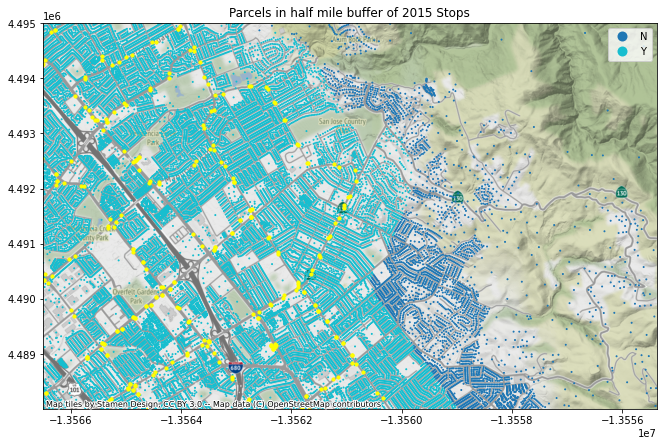

In [21]:
p10_half_mile_buffer_2015, p10_buffer_gdb = tag_parcel(p10_point_prj,'2015_half_mile_buffer.shp', 'hlf_ml_15')

# plot the parcels within this buffer in piece San Jose - slice so the dataset is small
p10_buffer_gdb = (p10_buffer_gdb.to_crs(epsg=3857)
                                .cx[sjzoom_extent_gdf.total_bounds[0]:sjzoom_extent_gdf.total_bounds[2],
                                    sjzoom_extent_gdf.total_bounds[1]:sjzoom_extent_gdf.total_bounds[3]])

figure, axesSJ = plt.subplots(figsize=(11,11))
axesSJ.set(title='Parcels in half mile buffer of 2015 Stops')
axesSJ.set_xlim(sjzoom_extent_gdf.total_bounds[0], sjzoom_extent_gdf.total_bounds[2])
axesSJ.set_ylim(sjzoom_extent_gdf.total_bounds[1], sjzoom_extent_gdf.total_bounds[3])
p10_buffer_gdb.plot(ax=axesSJ, markersize=1, column='hlf_ml_15', legend=True)
stop_2015.to_crs(epsg=3857).plot(ax=axesSJ, markersize=10, color='yellow')
ctx.add_basemap(axesSJ)

In [22]:
p10_quarter_mile_buffer_2015 = tag_parcel(p10_point_prj, '2015_quarter_mile_buffer.shp', 'qrt_ml_15')[0]

epsg:26910
(1956207, 4)


PARCEL_ID                        geometry  index_right         shape_type
0     229116  POINT (606025.249 4168247.936)          NaN                NaN
1     244166  POINT (613476.864 4175240.901)          NaN                NaN
2     202378  POINT (586912.561 4168032.862)          0.0  2015_quarter_mile

(1956207, 2)
Y    1300466
N     655741
Name: qrt_ml_15, dtype: int64


In [23]:
p10_half_mile_buffer_2035 = tag_parcel(p10_point_prj, '2035_half_mile_buffer.shp', 'hlf_ml_35')[0]

epsg:26910
(1956207, 4)


PARCEL_ID                        geometry  index_right      shape_type
0     229116  POINT (606025.249 4168247.936)          NaN             NaN
1     244166  POINT (613476.864 4175240.901)          0.0  2035_half_mile
2     202378  POINT (586912.561 4168032.862)          0.0  2035_half_mile

(1956207, 2)
Y    1657070
N     299137
Name: hlf_ml_35, dtype: int64


In [24]:
p10_quarter_mile_buffer_2035 = tag_parcel(p10_point_prj, '2035_quarter_mile_buffer.shp', 'qrt_ml_35')[0]

epsg:26910
(1956207, 4)


PARCEL_ID                        geometry  index_right         shape_type
0     229116  POINT (606025.249 4168247.936)          NaN                NaN
1     244166  POINT (613476.864 4175240.901)          NaN                NaN
2     202378  POINT (586912.561 4168032.862)          0.0  2035_quarter_mile

(1956207, 2)
Y    1301875
N     654332
Name: qrt_ml_35, dtype: int64


In [25]:
p10_tpa_half_mile_buffer_2015 = tag_parcel(p10_point_prj, '2015_tpa_half_mile_buffer.shp', 'tpa_hlf_ml_15')[0]

epsg:26910
(1956207, 4)


PARCEL_ID                        geometry  index_right shape_type
0     229116  POINT (606025.249 4168247.936)          NaN        NaN
1     244166  POINT (613476.864 4175240.901)          NaN        NaN
2     202378  POINT (586912.561 4168032.862)          NaN        NaN

(1956207, 2)
N    1183153
Y     773054
Name: tpa_hlf_ml_15, dtype: int64


In [26]:
p10_tpa_quarter_mile_buffer_2015 = tag_parcel(p10_point_prj, '2015_tpa_quarter_mile_buffer.shp', 'tpa_qrt_ml_15')[0]

epsg:26910
(1956207, 4)


PARCEL_ID                        geometry  index_right shape_type
0     229116  POINT (606025.249 4168247.936)          NaN        NaN
1     244166  POINT (613476.864 4175240.901)          NaN        NaN
2     202378  POINT (586912.561 4168032.862)          NaN        NaN

(1956207, 2)
N    1414674
Y     541533
Name: tpa_qrt_ml_15, dtype: int64


In [27]:
p10_tpa_half_mile_buffer_2035 = tag_parcel(p10_point_prj, '2035_tpa_half_mile_buffer.shp', 'tpa_hlf_ml_35')[0]

epsg:26910
(1956207, 4)


PARCEL_ID                        geometry  index_right shape_type
0     229116  POINT (606025.249 4168247.936)          NaN        NaN
1     244166  POINT (613476.864 4175240.901)          NaN        NaN
2     202378  POINT (586912.561 4168032.862)          NaN        NaN

(1956207, 2)
N    1182341
Y     773866
Name: tpa_hlf_ml_35, dtype: int64


epsg:26910
(1956207, 4)


PARCEL_ID                        geometry  index_right shape_type
0     229116  POINT (606025.249 4168247.936)          NaN        NaN
1     244166  POINT (613476.864 4175240.901)          NaN        NaN
2     202378  POINT (586912.561 4168032.862)          NaN        NaN

(1956207, 2)
N    1413265
Y     542942
Name: tpa_qrt_ml_35, dtype: int64


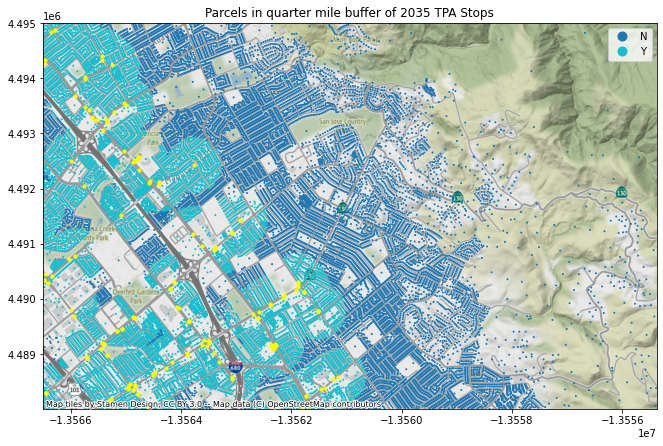

In [28]:
p10_tpa_quarter_mile_buffer_2035, p10_buffer_gdb = tag_parcel(p10_point_prj, '2035_tpa_quarter_mile_buffer.shp', 'tpa_qrt_ml_35')

# plot the parcels within this buffer in piece San Jose - slice so the dataset is small
p10_buffer_gdb = (p10_buffer_gdb.to_crs(epsg=3857)
                                .cx[sjzoom_extent_gdf.total_bounds[0]:sjzoom_extent_gdf.total_bounds[2],
                                    sjzoom_extent_gdf.total_bounds[1]:sjzoom_extent_gdf.total_bounds[3]])

figure, axesSJ = plt.subplots(figsize=(11,11))
axesSJ.set(title='Parcels in quarter mile buffer of 2035 TPA Stops')
axesSJ.set_xlim(sjzoom_extent_gdf.total_bounds[0], sjzoom_extent_gdf.total_bounds[2])
axesSJ.set_ylim(sjzoom_extent_gdf.total_bounds[1], sjzoom_extent_gdf.total_bounds[3])
p10_buffer_gdb.plot(ax=axesSJ, markersize=1, column='tpa_qrt_ml_35', legend=True)
stop_2035_tpa.to_crs(epsg=3857).plot(ax=axesSJ, markersize=10, color='yellow')
ctx.add_basemap(axesSJ)

In [29]:
# concatenate all parcel tagging dfs
p10_all_tags = pd.concat([p10_half_mile_buffer_2015,
                          p10_quarter_mile_buffer_2015,
                          p10_half_mile_buffer_2035,
                          p10_quarter_mile_buffer_2035,
                          p10_tpa_half_mile_buffer_2015,
                          p10_tpa_quarter_mile_buffer_2015,
                          p10_tpa_half_mile_buffer_2035,
                          p10_tpa_quarter_mile_buffer_2035], axis=1)

# drop duplicated columns
p10_all_tags = p10_all_tags.loc[:, ~p10_all_tags.columns.duplicated()]
display(p10_all_tags)

PARCEL_ID hlf_ml_15 qrt_ml_15 hlf_ml_35 qrt_ml_35 tpa_hlf_ml_15  \
0           229116         N         N         N         N             N   
1           244166         Y         N         Y         N             N   
2           202378         Y         Y         Y         Y             N   
3          2004420         N         N         N         N             N   
4           340332         Y         Y         Y         Y             Y   
...            ...       ...       ...       ...       ...           ...   
1956202     580747         Y         Y         Y         Y             N   
1956203     594355         Y         Y         Y         Y             N   
1956204     804156         Y         N         Y         N             Y   
1956205     646401         N         N         N         N             N   
1956206     782909         Y         Y         Y         Y             N   

        tpa_qrt_ml_15 tpa_hlf_ml_35 tpa_qrt_ml_35  
0                   N             N             N  
1                   N             N             N  
2                   N             N             N  
3                   N             N             N  
4                   N             Y             N  
...               ...           ...           ...  
1956202             N             N             N  
1956203             N             N             N  
1956204             N             Y             N  
1956205             N             N             N  
1956206             N             N             N  

[1956207 rows x 9 columns]

### Calculate housing units and jobs by buffer

In [30]:
baus_folder = 'C:\\Users\\{}\\Box\\Modeling and Surveys\\Urban Modeling\\Bay Area UrbanSim\\PBA50\\Final Blueprint runs\\Final Blueprint (s24)\\BAUS v2.25 - FINAL VERSION'.format(os.getenv('USERNAME'))
print("baus_folder = {}".format(baus_folder))

baus_folder = C:\Users\lzorn\Box\Modeling and Surveys\Urban Modeling\Bay Area UrbanSim\PBA50\Final Blueprint runs\Final Blueprint (s24)\BAUS v2.25 - FINAL VERSION


In [31]:
# read urbansim 2015 and 2035 parcel output
p15 = pd.read_csv(os.path.join(baus_folder, 'run182_parcel_data_2015.csv'),
                  usecols = ['parcel_id', 'residential_units', 'totemp'])
p15.rename(columns = {'residential_units': 'residential_units_2015',
                      'totemp': 'totemp_2015'}, inplace=True)
p35 = pd.read_csv(os.path.join(baus_folder, 'run182_parcel_data_2035_UBI.csv'),
                  usecols = ['parcel_id', 'residential_units', 'totemp'])
p35.rename(columns = {'residential_units': 'residential_units_2035',
                      'totemp': 'totemp_2035'}, inplace=True)

In [32]:
p = p15.merge(p35, on='parcel_id', how='outer')
display(p.head())

for i in ['residential_units_2015', 'residential_units_2035', 'totemp_2015', 'totemp_2035']:
    p[i] = p[i].fillna(0)
display(p.head())

parcel_id  residential_units_2015  totemp_2015  residential_units_2035  \
0     229116                     NaN          NaN                     NaN   
1     244166                     NaN          NaN                     NaN   
2     202378                    33.0          NaN                    34.0   
3    2004420                     0.0          NaN                     0.0   
4     340332                     NaN          NaN                     NaN   

   totemp_2035  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

parcel_id  residential_units_2015  totemp_2015  residential_units_2035  \
0     229116                     0.0          0.0                     0.0   
1     244166                     0.0          0.0                     0.0   
2     202378                    33.0          0.0                    34.0   
3    2004420                     0.0          0.0                     0.0   
4     340332                     0.0          0.0                     0.0   

   totemp_2035  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [33]:
# merge with parcel buffer taggings
p_tags = p.merge(p10_all_tags, left_on='parcel_id', right_on='PARCEL_ID', how='left')
display(p_tags)

parcel_id  residential_units_2015  totemp_2015  \
0           229116                     0.0          0.0   
1           244166                     0.0          0.0   
2           202378                    33.0          0.0   
3          2004420                     0.0          0.0   
4           340332                     0.0          0.0   
...            ...                     ...          ...   
1956207     782909                     0.0         11.0   
1956208    2054504                     0.0       1148.0   
1956209    2054505                  1843.0          0.0   
1956210    2054506                     0.0          0.0   
1956211     572927                     0.0          0.0   

         residential_units_2035  totemp_2035  PARCEL_ID hlf_ml_15 qrt_ml_15  \
0                           0.0          0.0   229116.0         N         N   
1                           0.0          0.0   244166.0         Y         N   
2                          34.0          0.0   202378.0         Y         Y   
3                           0.0          0.0  2004420.0         N         N   
4                           0.0          0.0   340332.0         Y         Y   
...                         ...          ...        ...       ...       ...   
1956207                     0.0          0.0   782909.0         Y         Y   
1956208                     0.0       1300.0        NaN       NaN       NaN   
1956209                  1843.0          0.0        NaN       NaN       NaN   
1956210                     0.0          0.0        NaN       NaN       NaN   
1956211                     0.0          0.0        NaN       NaN       NaN   

        hlf_ml_35 qrt_ml_35 tpa_hlf_ml_15 tpa_qrt_ml_15 tpa_hlf_ml_35  \
0               N         N             N             N             N   
1               Y         N             N             N             N   
2               Y         Y             N             N             N   
3               N         N             N             N             N   
4               Y         Y             Y             N             Y   
...           ...       ...           ...           ...           ...   
1956207         Y         Y             N             N             N   
1956208       NaN       NaN           NaN           NaN           NaN   
1956209       NaN       NaN           NaN           NaN           NaN   
1956210       NaN       NaN           NaN           NaN           NaN   
1956211       NaN       NaN           NaN           NaN           NaN   

        tpa_qrt_ml_35  
0                   N  
1                   N  
2                   N  
3                   N  
4                   N  
...               ...  
1956207             N  
1956208           NaN  
1956209           NaN  
1956210           NaN  
1956211           NaN  

[1956212 rows x 14 columns]

In [34]:
# summarize by buffers

print('2015 housing units and jobs within quarter-mile buffer of transit stations/stops:')
display(p_tags.loc[p_tags.qrt_ml_15 == 'Y'][['residential_units_2015', 'totemp_2015']].sum())

print('2015 housing units and jobs within half-mile buffer of transit stations/stops:')
display(p_tags.loc[p_tags.hlf_ml_15 == 'Y'][['residential_units_2015', 'totemp_2015']].sum())

print('2035 housing units and jobs within quarter-mile buffer of transit stations/stops:')
display(p_tags.loc[p_tags.qrt_ml_35 == 'Y'][['residential_units_2035', 'totemp_2035']].sum())

print('2035 housing units and jobs within half-mile buffer of transit stations/stops:')
display(p_tags.loc[p_tags.hlf_ml_35 == 'Y'][['residential_units_2035', 'totemp_2035']].sum())

print('2015 housing units and jobs within quarter-mile buffer of transit stations/stops within TPA:')
display(p_tags.loc[p_tags.tpa_qrt_ml_15 == 'Y'][['residential_units_2015', 'totemp_2015']].sum())

print('2015 housing units and jobs within half-mile buffer of transit stations/stops within TPA:')
display(p_tags.loc[p_tags.tpa_hlf_ml_15 == 'Y'][['residential_units_2015', 'totemp_2015']].sum())

print('2035 housing units and jobs within quarter-mile buffer of transit stations/stops within TPA:')
display(p_tags.loc[p_tags.tpa_qrt_ml_35 == 'Y'][['residential_units_2035', 'totemp_2035']].sum())

print('2035 housing units and jobs within half-mile buffer of transit stations/stops within TPA:')
display(p_tags.loc[p_tags.tpa_hlf_ml_35 == 'Y'][['residential_units_2035', 'totemp_2035']].sum())


2015 housing units and jobs within quarter-mile buffer of transit stations/stops:


residential_units_2015    2145377.0
totemp_2015               3409473.0
dtype: float64

2015 housing units and jobs within half-mile buffer of transit stations/stops:


residential_units_2015    2575768.0
totemp_2015               3787383.0
dtype: float64

2035 housing units and jobs within quarter-mile buffer of transit stations/stops:


residential_units_2035    2857222.0
totemp_2035               4071918.0
dtype: float64

2035 housing units and jobs within half-mile buffer of transit stations/stops:


residential_units_2035    3356622.0
totemp_2035               4582910.0
dtype: float64

2015 housing units and jobs within quarter-mile buffer of transit stations/stops within TPA:


residential_units_2015    1121311.0
totemp_2015               2071981.0
dtype: float64

2015 housing units and jobs within half-mile buffer of transit stations/stops within TPA:


residential_units_2015    1479908.0
totemp_2015               2537472.0
dtype: float64

2035 housing units and jobs within quarter-mile buffer of transit stations/stops within TPA:


residential_units_2035    1691003.0
totemp_2035               2533934.0
dtype: float64

2035 housing units and jobs within half-mile buffer of transit stations/stops within TPA:


residential_units_2035    2131182.0
totemp_2035               3134814.0
dtype: float64